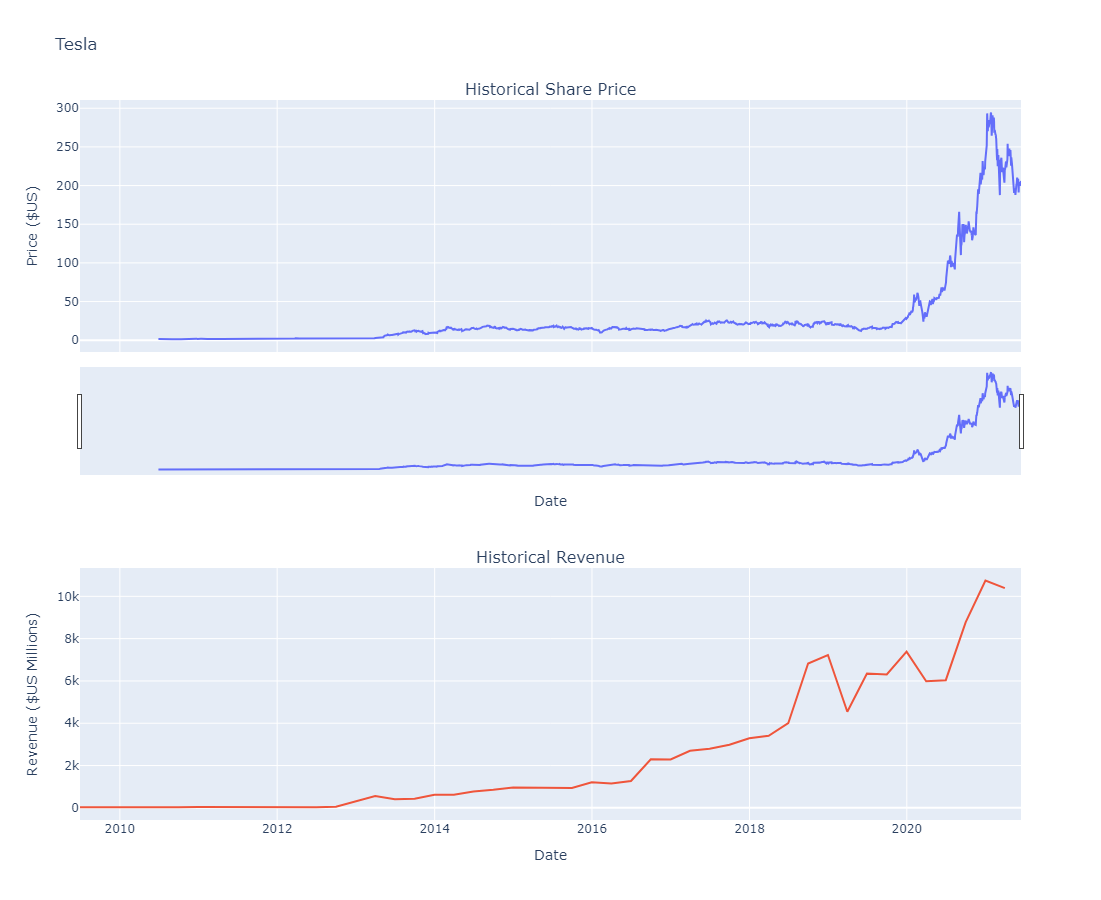

In [6]:
import requests
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

tsla = yf.Ticker('TSLA')
tsla_data = tsla.history(period = 'max')
tsla_data.reset_index(inplace=True)


URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
data = requests.get(URL).text
soup = BeautifulSoup(data,'html.parser')
tsla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in soup.find_all('tbody')[1].find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text

    df = pd.DataFrame({'Date':[date], 'Revenue':[revenue]})
    tsla_revenue = pd.concat([tsla_revenue, df], ignore_index = True)

tsla_revenue["Revenue"] = tsla_revenue['Revenue'].str.replace(',','').str.replace('$','')
tsla_revenue.dropna(inplace=True)
tsla_revenue = tsla_revenue[tsla_revenue['Revenue'] != ""]
tsla_revenue.tail()

make_graph(tsla_data, tsla_revenue, 'Tesla')